**Prediksi Kelayakan Kredit dengan Metode Naive Bayes & Support Vector Machine: Kasus Home Credit**   


tujuan: Membuat Model Machine Learning dengan menerapkan metode Metode Naive Bayes & Support Vector Machine dalam memprediksi apakah seseorang pengguna Home Credit apakah layak atau tidak layak diberikan kredit

##**Integrasikan Google Colab ke Gdrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Import Package & Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#**Import Dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/homecreditdefaultrisk/bureau.csv')
data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


#**Data Understanding**

In [ ]:
data.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


#**Menampilkan jumlah missing values**

In [ ]:
data.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


#**Mengisi data missing values**

In [ ]:
data['DAYS_CREDIT_ENDDATE'] = data['DAYS_CREDIT_ENDDATE'].fillna(data['DAYS_CREDIT_ENDDATE'].mean())
data['DAYS_ENDDATE_FACT'] = data['DAYS_ENDDATE_FACT'].fillna(data['DAYS_ENDDATE_FACT'].mean())
data['AMT_CREDIT_MAX_OVERDUE'] = data['AMT_CREDIT_MAX_OVERDUE'].fillna(data['AMT_CREDIT_MAX_OVERDUE'].mean())
data['AMT_CREDIT_SUM'] = data['AMT_CREDIT_SUM'].fillna(data['AMT_CREDIT_SUM'].mean())
data['AMT_CREDIT_SUM_DEBT'] = data['AMT_CREDIT_SUM_DEBT'].fillna(data['AMT_CREDIT_SUM_DEBT'].mean())
data['AMT_CREDIT_SUM_LIMIT'] = data['AMT_CREDIT_SUM_LIMIT'].fillna(data['AMT_CREDIT_SUM_LIMIT'].mean())
data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mean())

In [ ]:
print(data.isnull().sum())

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64


#Menlihat Duplikasi Data

In [ ]:
duplikat = data.duplicated()
duplikat

0          False
1          False
2          False
3          False
4          False
           ...  
1716423    False
1716424    False
1716425    False
1716426    False
1716427    False
Length: 1716428, dtype: bool

In [ ]:
data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.000000,-153.000000,3825.417661,0,91323.00,0.000000,6229.51498,0.0,Consumer credit,-131,15712.7577
1,215354,5714463,Active,currency 1,-208,0,1075.000000,-1017.437148,3825.417661,0,225000.00,171342.000000,6229.51498,0.0,Credit card,-20,15712.7577
2,215354,5714464,Active,currency 1,-203,0,528.000000,-1017.437148,3825.417661,0,464323.50,137085.119952,6229.51498,0.0,Consumer credit,-16,15712.7577
3,215354,5714465,Active,currency 1,-203,0,510.517362,-1017.437148,3825.417661,0,90000.00,137085.119952,6229.51498,0.0,Credit card,-16,15712.7577
4,215354,5714466,Active,currency 1,-629,0,1197.000000,-1017.437148,77674.500000,0,2700000.00,137085.119952,6229.51498,0.0,Consumer credit,-21,15712.7577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.000000,-1017.437148,0.000000,0,11250.00,11250.000000,0.00000,0.0,Microloan,-19,15712.7577
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.000000,-2493.000000,5476.500000,0,38130.84,0.000000,0.00000,0.0,Consumer credit,-2493,15712.7577
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.000000,-970.000000,3825.417661,0,15570.00,137085.119952,6229.51498,0.0,Consumer credit,-967,15712.7577
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.000000,-1513.000000,3825.417661,0,36000.00,0.000000,0.00000,0.0,Consumer credit,-1508,15712.7577


#**Encoding Nilai pada atribut CREDIT_ACTIVE**

In [ ]:
data["CREDIT_ACTIVE"] = data["CREDIT_ACTIVE"].replace({"Active": 1, "Closed": 0,"Sold":1 , "Bad debt":0})
data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,0,currency 1,-497,0,-153.000000,-153.000000,3825.417661,0,91323.00,0.000000,6229.51498,0.0,Consumer credit,-131,15712.7577
1,215354,5714463,1,currency 1,-208,0,1075.000000,-1017.437148,3825.417661,0,225000.00,171342.000000,6229.51498,0.0,Credit card,-20,15712.7577
2,215354,5714464,1,currency 1,-203,0,528.000000,-1017.437148,3825.417661,0,464323.50,137085.119952,6229.51498,0.0,Consumer credit,-16,15712.7577
3,215354,5714465,1,currency 1,-203,0,510.517362,-1017.437148,3825.417661,0,90000.00,137085.119952,6229.51498,0.0,Credit card,-16,15712.7577
4,215354,5714466,1,currency 1,-629,0,1197.000000,-1017.437148,77674.500000,0,2700000.00,137085.119952,6229.51498,0.0,Consumer credit,-21,15712.7577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,1,currency 1,-44,0,-30.000000,-1017.437148,0.000000,0,11250.00,11250.000000,0.00000,0.0,Microloan,-19,15712.7577
1716424,100044,5057754,0,currency 1,-2648,0,-2433.000000,-2493.000000,5476.500000,0,38130.84,0.000000,0.00000,0.0,Consumer credit,-2493,15712.7577
1716425,100044,5057762,0,currency 1,-1809,0,-1628.000000,-970.000000,3825.417661,0,15570.00,137085.119952,6229.51498,0.0,Consumer credit,-967,15712.7577
1716426,246829,5057770,0,currency 1,-1878,0,-1513.000000,-1513.000000,3825.417661,0,36000.00,0.000000,0.00000,0.0,Consumer credit,-1508,15712.7577


In [ ]:
data.describe()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06
mean,2.782149e+05,5.924434e+06,3.711976e-01,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,4.831253e-01,7.951649e+02,3.654443e+01,4.838222e+03,5.671017e+02,1.209928e+05,9.622391e-02,1.149807e+06,6.244891e+05,3.645163e+04,5.937650e+03,7.207473e+02,1.740247e+05
min,1.000010e+05,5.000000e+06,0.000000e+00,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,0.000000e+00,-1.666000e+03,0.000000e+00,-1.074000e+03,-1.089000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,1.571276e+04
50%,2.780550e+05,5.926304e+06,0.000000e+00,-9.870000e+02,0.000000e+00,-2.370000e+02,-1.017437e+03,3.825418e+03,0.000000e+00,1.255230e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,1.571276e+04
75%,3.674260e+05,6.385681e+06,1.000000e+00,-4.740000e+02,0.000000e+00,5.105174e+02,-6.910000e+02,3.825418e+03,0.000000e+00,3.150000e+05,1.370851e+05,6.229515e+03,0.000000e+00,-3.300000e+01,1.571276e+04
max,4.562550e+05,6.843457e+06,1.000000e+00,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [ ]:
# Menambahkan kolom baru dengan kondisi yang ditentukan, membantu dalam memprediksi
data['layak'] = data.apply(lambda x: 0 if (x['CREDIT_DAY_OVERDUE'] >= 0.1 and x['AMT_CREDIT_SUM_OVERDUE'] > 2 ) or x['CREDIT_ACTIVE'] == 1 else 1, axis=1)
data


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,layak
0,215354,5714462,0,currency 1,-497,0,-153.000000,-153.000000,3825.417661,0,91323.00,0.000000,6229.51498,0.0,Consumer credit,-131,15712.7577,1
1,215354,5714463,1,currency 1,-208,0,1075.000000,-1017.437148,3825.417661,0,225000.00,171342.000000,6229.51498,0.0,Credit card,-20,15712.7577,0
2,215354,5714464,1,currency 1,-203,0,528.000000,-1017.437148,3825.417661,0,464323.50,137085.119952,6229.51498,0.0,Consumer credit,-16,15712.7577,0
3,215354,5714465,1,currency 1,-203,0,510.517362,-1017.437148,3825.417661,0,90000.00,137085.119952,6229.51498,0.0,Credit card,-16,15712.7577,0
4,215354,5714466,1,currency 1,-629,0,1197.000000,-1017.437148,77674.500000,0,2700000.00,137085.119952,6229.51498,0.0,Consumer credit,-21,15712.7577,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,1,currency 1,-44,0,-30.000000,-1017.437148,0.000000,0,11250.00,11250.000000,0.00000,0.0,Microloan,-19,15712.7577,0
1716424,100044,5057754,0,currency 1,-2648,0,-2433.000000,-2493.000000,5476.500000,0,38130.84,0.000000,0.00000,0.0,Consumer credit,-2493,15712.7577,1
1716425,100044,5057762,0,currency 1,-1809,0,-1628.000000,-970.000000,3825.417661,0,15570.00,137085.119952,6229.51498,0.0,Consumer credit,-967,15712.7577,1
1716426,246829,5057770,0,currency 1,-1878,0,-1513.000000,-1513.000000,3825.417661,0,36000.00,0.000000,0.00000,0.0,Consumer credit,-1508,15712.7577,1


In [ ]:
#nilai unik pada atribut baru 'layak'
unique_values = data['layak'].unique()
unique_values

array([1, 0])

#**Visualisasi Sebaran Nilai atribut proses encoding**

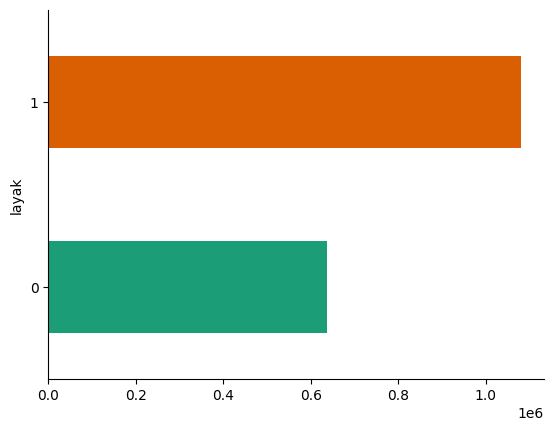

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('layak').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

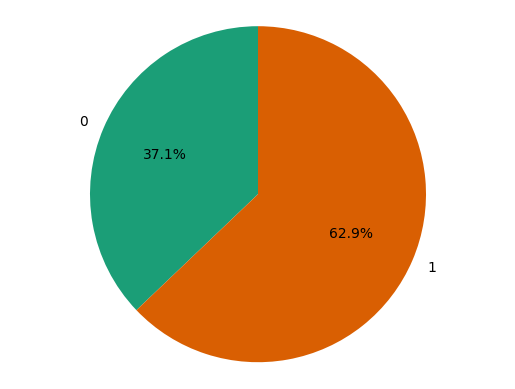

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kelompokkan data berdasarkan 'layak' dan hitung jumlahnya
counts = data.groupby('layak').size()

# Buat pie chart
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90, colors=sns.palettes.mpl_palette('Dark2'))

# Sembunyikan bingkai pie chart
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran sempurna
plt.axis('off')  # Sembunyikan sumbu koordinat

# Tampilkan pie chart
plt.show()


#**Metode Naive Bayes**

#**Split Data**

In [ ]:
df=data
# Split data into dependent/independent variables
X = df[['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT']].values
y = df.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .50)

X_train.shape, X_test.shape

((858214, 2), (858214, 2))

#**Standarisasi Skalar**

In [ ]:
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Membangun Model**

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 0]
 [1 1]]


#**Performa Model**

In [ ]:
print("> Akurasi Score : ",accuracy_score(y_test, y_pred),"\n")
print(f'> Classification Report: \n{classification_report (y_test, y_pred)}','\n')
print(f"> F1 Score: {f1_score(y_test, y_pred)}")

> Akurasi Score :  0.7253097712225622 

> Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.27      0.42    318602
           1       0.70      0.99      0.82    539612

    accuracy                           0.73    858214
   macro avg       0.83      0.63      0.62    858214
weighted avg       0.80      0.73      0.67    858214
 

> F1 Score: 0.8198574558303348


#**Confusion Matrix**

<Axes: >

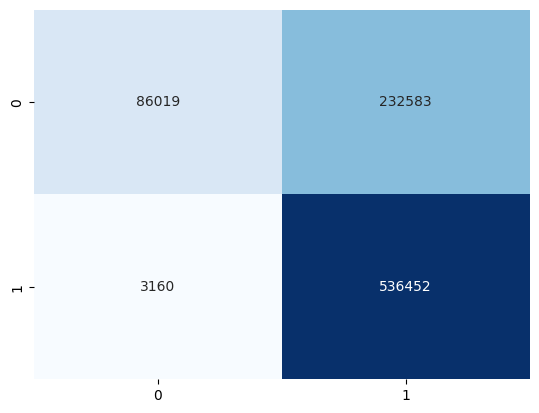

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

#**Precision- Recall Curve**

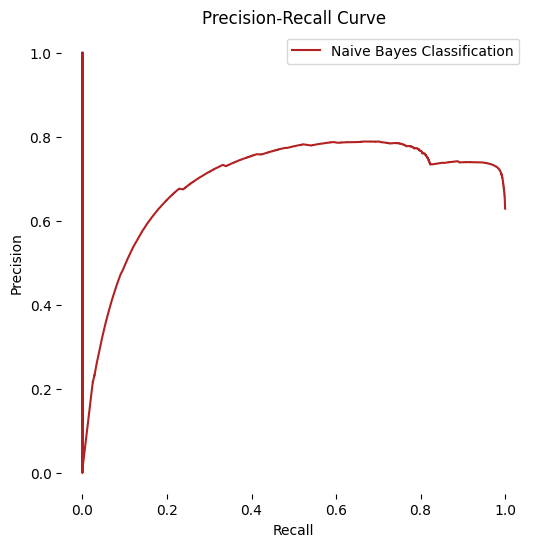

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Naive Bayes Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

#**ROC Curve**

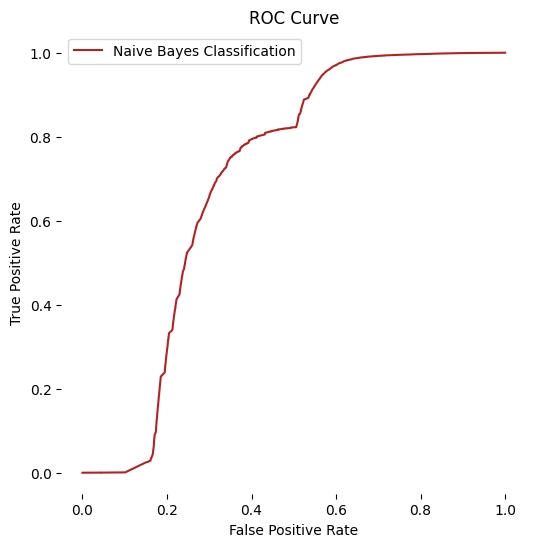

In [ ]:
# Plot ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color='firebrick')

# Set judul dan label sumbu
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)

# Tambahkan legenda
ax.legend();

#**Visualisasi Prediksi Naive Bayes**

<ipython-input-27-952b3a56713a>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


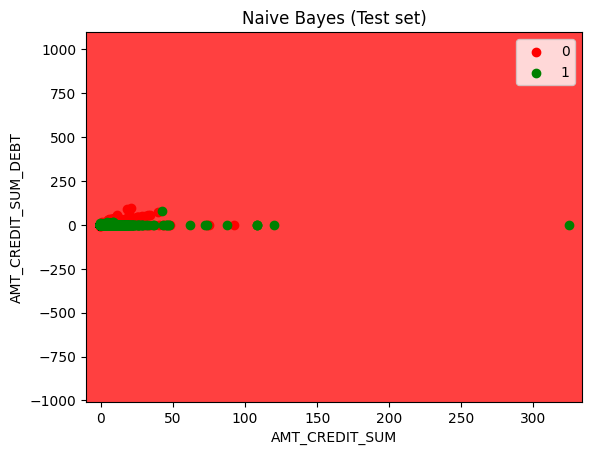

In [ ]:
# Buat meshgrid untuk visualisasi
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 10, stop = X_test[:, 0].max() + 10, step = 1),
                     np.arange(start = X_test[:, 1].min() - 1000, stop = X_test[:, 1].max() + 1000, step = 1))

# Prediksi untuk meshgrid
y_pred = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot kontur prediksi
plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot scatter plot data pelatihan
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

# Tambahkan title, label, dan legend
plt.title('Naive Bayes (Test set)')
plt.xlabel('AMT_CREDIT_SUM')
plt.ylabel('AMT_CREDIT_SUM_DEBT')
plt.legend()

# Tampilkan plot
plt.show()


<ipython-input-28-3ca00ff8d68c>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


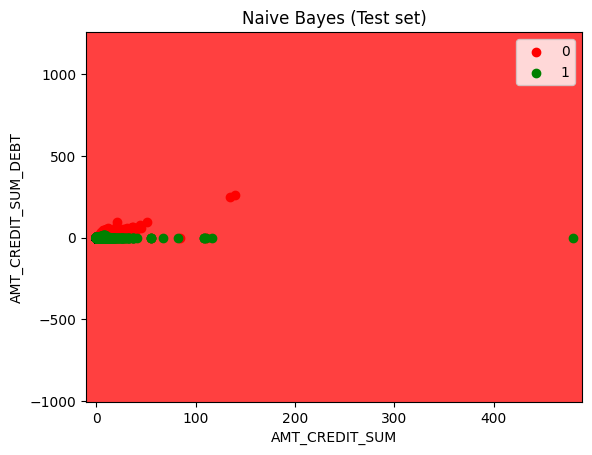

In [ ]:
# Buat meshgrid untuk visualisasi
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 10, stop = X_train[:, 0].max() + 10, step = 1),
                     np.arange(start = X_train[:, 1].min() - 1000, stop = X_train[:, 1].max() + 1000, step = 1))

# Prediksi untuk meshgrid
y_pred = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot kontur prediksi
plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot scatter plot data pelatihan
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Train set)')
plt.xlabel('AMT_CREDIT_SUM')
plt.ylabel('AMT_CREDIT_SUM_DEBT')
plt.legend()


# Tampilkan plot
plt.show()


#**Hasil Prediksi**

In [ ]:
datapred = pd.DataFrame({'x': X1.ravel(), 'y': X2.ravel()})
# Tambahkan kolom prediksi ke dataframe
datapred['prediction'] = y_pred.ravel()
# Tampilkan dataframe hasil prediksi
datapred


,x,y,prediction
0,-10.291226,-1004.460089,1
1,-9.291226,-1004.460089,1
2,-8.291226,-1004.460089,1
3,-7.291226,-1004.460089,1
4,-6.291226,-1004.460089,1
...,...,...,...
1131495,484.708774,1257.539911,1
1131496,485.708774,1257.539911,1
1131497,486.708774,1257.539911,1
1131498,487.708774,1257.539911,1


from matplotlib import pyplot as plt
datapred['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datapred['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datapred.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['y']
  ys = series['x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datapred.sort_values('y', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('y')
_ = plt.ylabel('x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['y']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'y'}, axis=1)
              .sort_values('y', ascending=True))
  xs = counted['y']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datapred.sort_values('y', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('y')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['prediction']
  ys = series['x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datapred.sort_values('prediction', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('prediction')
_ = plt.ylabel('x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['prediction']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'prediction'}, axis=1)
              .sort_values('prediction', ascending=True))
  xs = counted['prediction']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datapred.sort_values('prediction', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('prediction')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
datapred['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
datapred['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

#**Uji Prediksi dengan Inputan**

In [ ]:
print(classifier.predict(sc.transform([[50000, 19000888888]])))

[0]


In [ ]:
print(classifier.predict(sc.transform([[500000, 348]])))

[1]


#**Metode SVM**

#**Split Data**

In [ ]:
# Split data into dependent/independent variables
X = df[['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT']].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .50)

X_train.shape, X_test.shape

((858214, 2), (858214, 2))

#**Standarisasi Skalar**

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Membangun Model**

In [ ]:
from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state=0)
classifier = SVC(kernel='linear', C=0.1, max_iter=10000, random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=0.1, kernel='linear', max_iter=10000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[1 0]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 0]
 [1 1]]


#**Performa Model**

In [ ]:
print("> Akurasi Score : ",accuracy_score(y_test, y_pred),"\n")
print(f'> Classification Report: \n{classification_report (y_test, y_pred)}','\n')
print(f"> F1 Score: {f1_score(y_test, y_pred)}")

> Akurasi Score :  0.6287604257213236 

> Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    318602
           1       0.63      1.00      0.77    539612

    accuracy                           0.63    858214
   macro avg       0.31      0.50      0.39    858214
weighted avg       0.40      0.63      0.49    858214
 

> F1 Score: 0.7720723266503318


#**Confusion Matriks**

<Axes: >

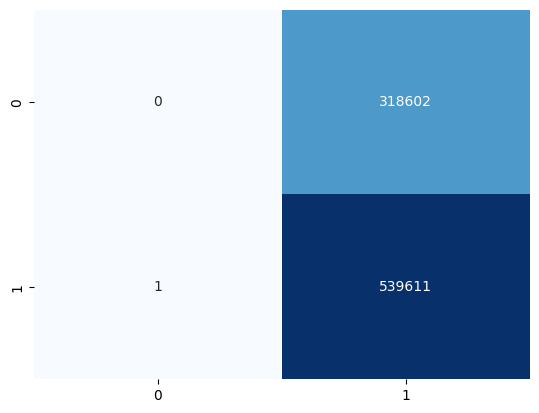

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

#**Precision - Recall Curve**

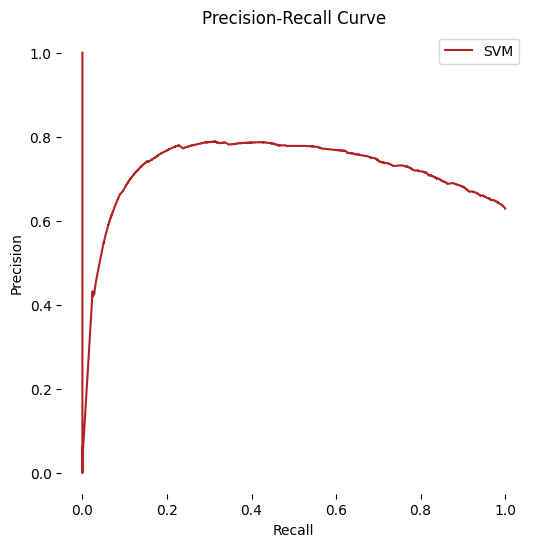

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

#**ROC Curve**

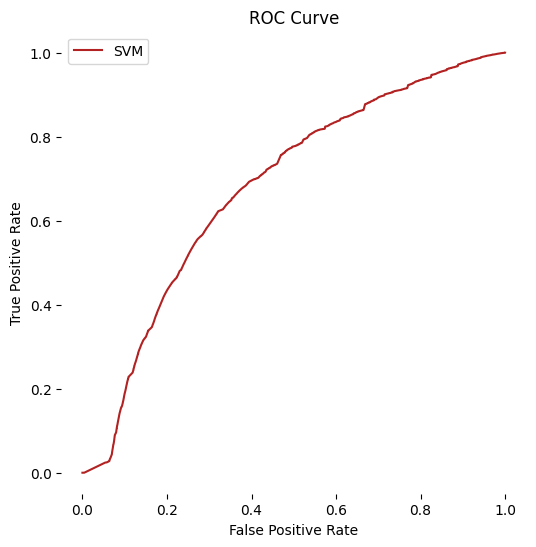

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

#**Visualisasi Prediksi Model SVM**

<ipython-input-57-928a20f04c7b>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


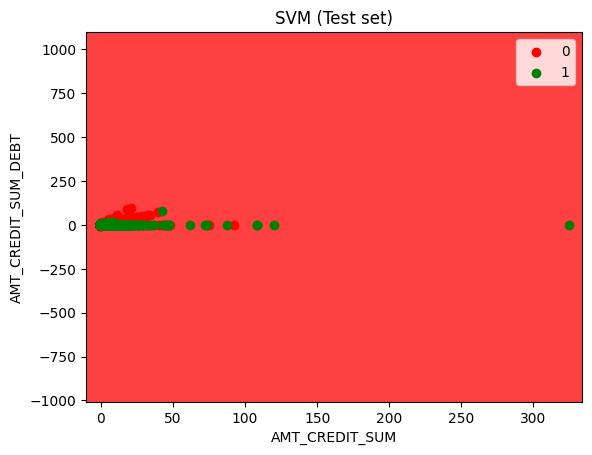

In [ ]:
# Buat meshgrid untuk visualisasi
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 10, stop = X_test[:, 0].max() + 10, step = 1),
                     np.arange(start = X_test[:, 1].min() - 1000, stop = X_test[:, 1].max() + 1000, step = 1))

# Prediksi untuk meshgrid
y_pred = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot kontur prediksi
plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot scatter plot data pelatihan
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

# Tambahkan title, label, dan legend
plt.title('SVM (Test set)')
plt.xlabel('AMT_CREDIT_SUM')
plt.ylabel('AMT_CREDIT_SUM_DEBT')
plt.legend()

# Tampilkan plot
plt.show()

<ipython-input-58-480f1d083120>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


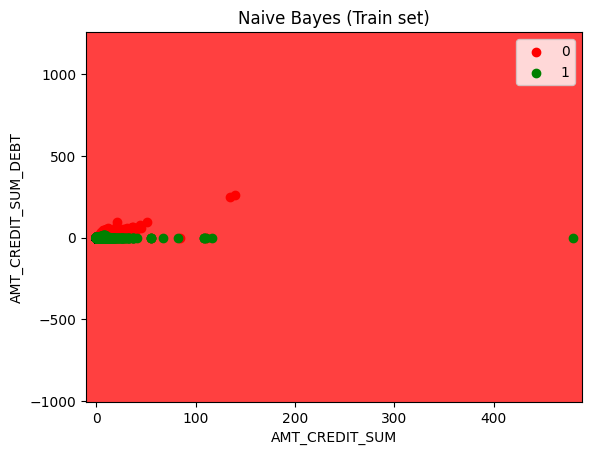

In [ ]:
# Buat meshgrid untuk visualisasi
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 10, stop = X_train[:, 0].max() + 10, step = 1),
                     np.arange(start = X_train[:, 1].min() - 1000, stop = X_train[:, 1].max() + 1000, step = 1))

# Prediksi untuk meshgrid
y_pred = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot kontur prediksi
plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot scatter plot data pelatihan
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Train set)')
plt.xlabel('AMT_CREDIT_SUM')
plt.ylabel('AMT_CREDIT_SUM_DEBT')
plt.legend()


# Tampilkan plot
plt.show()

#**Hasil Prediksi**

In [ ]:
datapreds = pd.DataFrame({'x': X1.ravel(), 'y': X2.ravel()})

# Tambahkan kolom prediksi ke dataframe
datapreds['prediction'] = y_pred.ravel()

# Tampilkan dataframe hasil prediksi
datapreds

,x,y,prediction
0,-10.291226,-1004.460089,1
1,-9.291226,-1004.460089,1
2,-8.291226,-1004.460089,1
3,-7.291226,-1004.460089,1
4,-6.291226,-1004.460089,1
...,...,...,...
1131495,484.708774,1257.539911,1
1131496,485.708774,1257.539911,1
1131497,486.708774,1257.539911,1
1131498,487.708774,1257.539911,1


#**Uji Prediksi dengan Inputan**

In [ ]:
print(classifier.predict(sc.transform([[50000, 19000888888]])))

[0]


In [ ]:
print(classifier.predict(sc.transform([[500000, 348]])))

[1]
